# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
!pip install requests

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#getweatherdata

city_list=[]
lat = []
long = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


rcd = 0
sets = 1
city_weather = []

url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [26]:
#Print Beginning Log Statement

print(
    f'Beginning Data Retrieval\n'     
f'-----------------------------')

for city in cities:
    
    try: 
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json() 
        print(f'Processing Record {rcd} of Set {sets} | {city}')
        lat.append(json_response['coord']['lat'])
        long.append(json_response["coord"]["lon"])
        temp.append(json_response['main']['temp'])
        max_temp.append(json_response['main']['temp_max'])
        wind_speed.append(json_response['wind']['speed'])
        humidity.append(json_response['main']['humidity'])
        cloudiness.append(json_response['clouds']['all'])
        wind_speed.append(json_response['wind']['speed'])
        country.append(json_response['sys']['country'])
        date.append(json_response["dt"])
        rcd += 1

        if rcd == 50:
            rcd = 0
            sets += 1 
            
# If an error is experienced, skip the city
    except: (ValueError,IOError) 
    print("City not found. Skipping...") 
    pass
    
    continue
    
# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 45 of Set 13 | buta
City not found. Skipping...
Processing Record 45 of Set 13 | perambalur
City not found. Skipping...
Processing Record 45 of Set 13 | ulcinj
City not found. Skipping...
Processing Record 45 of Set 13 | birnin kebbi
City not found. Skipping...
Processing Record 45 of Set 13 | busselton
City not found. Skipping...
Processing Record 45 of Set 13 | rikitea
City not found. Skipping...
Processing Record 45 of Set 13 | nalgonda
City not found. Skipping...
Processing Record 45 of Set 13 | ushuaia
City not found. Skipping...
Processing Record 45 of Set 13 | dolbeau
City not found. Skipping...
Processing Record 45 of Set 13 | grezzana
City not found. Skipping...
Processing Record 45 of Set 13 | torbay
City not found. Skipping...
Processing Record 45 of Set 13 | georgetown
City not found. Skipping...
Processing Record 45 of Set 13 | monrovia
City not found. Skipping...
Processing Record 45 of Set 13 | kodi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_dataframe = {
    "City": cities, 
    "Lat": lat,
    "Lng": long, 
    "Temp": temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country
}

weather_data = pd.DataFrame(weather_dataframe)

In [ ]:
weather_data

In [27]:
len(cities), len(lat), len(long), len(temp), len(max_temp), len(humidity), len(cloudiness), len(wind_speed), len(country)


(645, 0, 0, 0, 0, 0, 0, 0, 0)

In [ ]:
# Export the City_Data into a csv

weather_data.to_csv("MKWeatherPyData.csv",encoding="utf-8",index=False)


In [33]:
#Read CSV file and put into dataframe

mkdata_df=pd.read_csv("MKWeatherPyData.csv")
mkdata_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,0,abu samrah,100.0,SY,1588646229,69.0,35.30,37.18,287.94,0.04
1,1,tura,0.0,IN,1588646230,48.0,25.52,90.22,302.73,1.88
2,2,mataura,88.0,NZ,1588646230,82.0,-46.19,168.86,279.13,3.23
3,3,vallenar,9.0,CL,1588646231,66.0,-28.57,-70.76,287.05,1.03
4,4,bluff,91.0,NZ,1588646233,66.0,-46.60,168.33,281.00,7.30
...,...,...,...,...,...,...,...,...,...,...
495,619,kamaishi,75.0,JP,1588648354,48.0,39.27,141.88,290.15,4.10
496,620,doha,0.0,QA,1588648354,41.0,25.29,51.53,301.48,1.00
497,621,lively,5.0,CA,1588648359,43.0,46.43,-81.15,275.93,3.10
498,622,koge,0.0,DK,1588648361,75.0,55.46,12.18,278.15,4.60


In [34]:
#Generate Summary Table of Data

mkdata_df.describe()

,Unnamed: 0,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,314.744000,48.648000,1.588647e+09,68.972000,19.462300,20.944600,290.323940,3.414540
std,181.998575,39.257897,6.687680e+02,20.211983,33.322609,92.968231,10.371968,2.471362
min,0.000000,0.000000,1.588646e+09,8.000000,-54.800000,-179.170000,258.150000,0.040000
25%,157.750000,3.000000,1.588647e+09,57.000000,-7.487500,-67.610000,282.360000,1.630000
50%,315.500000,43.000000,1.588647e+09,73.000000,22.550000,27.070000,291.150000,2.865000
75%,467.250000,90.000000,1.588648e+09,85.000000,47.432500,107.307500,299.150000,4.600000
max,624.000000,100.000000,1.588648e+09,100.000000,78.220000,179.320000,308.940000,21.100000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

As indicated above in summary table, there is no humidity level above 100% as the max is 100.

No need to get the indices of cities that have humidity over 100%.


In [38]:
Humiditydata_df = mkdata_df["Humidity"]
Humiditydata_df

0      69.0
1      48.0
2      82.0
3      66.0
4      66.0
       ... 
495    48.0
496    41.0
497    43.0
498    75.0
499    50.0
Name: Humidity, Length: 500, dtype: float64

In [39]:
#Determine Outliars
quartiles = Humiditydata_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 57.0
The upper quartile of Humidity is: 85.0
The interquartile range of Humidity is: 28.0
The the median of Humidity is: 73.0 
Values below 15.0 could be outliers.
Values above 127.0 could be outliers.


There are humidity outliers since there are values below 15 as indicated by the summary table above (Humidity, min = 8).

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = mkdata_df.drop(mkdata_df[mkdata_df['Humidity'] < 15].index, inplace = False)
clean_city_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,0,abu samrah,100.0,SY,1588646229,69.0,35.30,37.18,287.94,0.04
1,1,tura,0.0,IN,1588646230,48.0,25.52,90.22,302.73,1.88
2,2,mataura,88.0,NZ,1588646230,82.0,-46.19,168.86,279.13,3.23
3,3,vallenar,9.0,CL,1588646231,66.0,-28.57,-70.76,287.05,1.03
4,4,bluff,91.0,NZ,1588646233,66.0,-46.60,168.33,281.00,7.30
...,...,...,...,...,...,...,...,...,...,...
495,619,kamaishi,75.0,JP,1588648354,48.0,39.27,141.88,290.15,4.10
496,620,doha,0.0,QA,1588648354,41.0,25.29,51.53,301.48,1.00
497,621,lively,5.0,CA,1588648359,43.0,46.43,-81.15,275.93,3.10
498,622,koge,0.0,DK,1588648361,75.0,55.46,12.18,278.15,4.60


In [47]:
#Checking if Humidity Outliers are removed -- confirmed! (Min = 15)
clean_city_df.describe()

,Unnamed: 0,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
count,493.000000,493.000000,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000
mean,314.606491,49.300203,1.588647e+09,69.776876,19.281765,21.730223,290.211947,3.414604
std,181.873893,39.143045,6.685451e+02,19.181178,33.489175,93.023619,10.341547,2.482347
min,0.000000,0.000000,1.588646e+09,15.000000,-54.800000,-179.170000,258.150000,0.040000
25%,158.000000,5.000000,1.588647e+09,59.000000,-7.710000,-66.980000,282.150000,1.560000
50%,315.000000,45.000000,1.588647e+09,73.000000,22.240000,27.910000,291.150000,2.860000
75%,467.000000,90.000000,1.588648e+09,85.000000,47.440000,108.350000,299.150000,4.600000
max,624.000000,100.000000,1.588648e+09,100.000000,78.220000,179.320000,308.940000,21.100000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

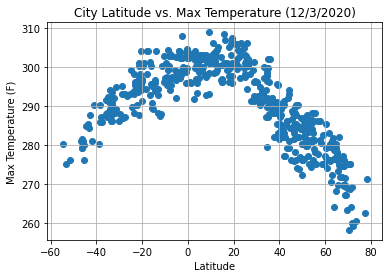

In [58]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12/3/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('MaxTempPerLat.png')

# Show plot
plt.show()

## Latitude vs. Humidity Plot

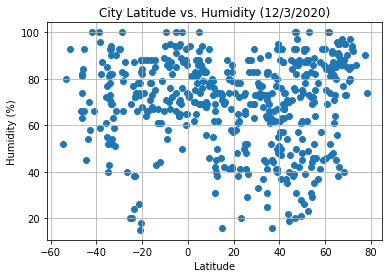

In [59]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12/3/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('HumidityPerLat.png')

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

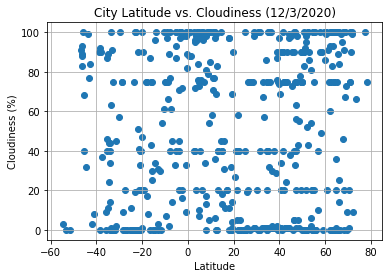

In [60]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12/3/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('CloudinessPerLat.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

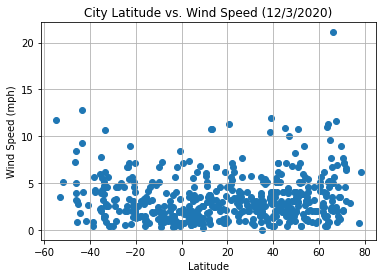

In [61]:
 # Build a scatter plot for each data type
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12/3/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('WindSpeedPerLat.png')

# Show plot
plt.show()

## Linear Regression

In [65]:
#Seperate plots into northern hemisphere (greater than or equal to 0 degrees latitdue) and Southern hemisphere (less than 0 degrees latitude)
southern_df = mkdata_df.drop(mkdata_df[mkdata_df['Lat'] >= 0].index, inplace = False)
southern_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
2,2,mataura,88.0,NZ,1588646230,82.0,-46.19,168.86,279.13,3.23
3,3,vallenar,9.0,CL,1588646231,66.0,-28.57,-70.76,287.05,1.03
4,4,bluff,91.0,NZ,1588646233,66.0,-46.60,168.33,281.00,7.30
5,5,ushuaia,3.0,AR,1588645688,52.0,-54.80,-68.30,280.15,11.80
6,6,phalombe,30.0,MW,1588646236,73.0,-15.81,35.65,289.59,1.54
...,...,...,...,...,...,...,...,...,...,...
471,590,dubbo,0.0,AU,1588648256,59.0,-32.25,148.62,292.15,5.70
472,591,omaruru,0.0,NaN,1588648261,26.0,-21.43,15.93,287.72,1.39
475,594,salinopolis,82.0,BR,1588648267,86.0,-0.61,-47.36,299.63,3.31
479,600,faanui,0.0,PF,1588648289,71.0,-16.48,-151.75,301.21,2.81


In [69]:
northern_df.describe()

,Unnamed: 0,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
count,339.000000,339.000000,3.390000e+02,339.000000,339.000000,339.000000,339.000000,339.000000
mean,329.997050,50.504425,1.588647e+09,68.469027,37.999056,15.134366,288.695782,3.492065
std,179.742395,39.679438,6.539188e+02,19.643451,20.510467,90.265737,11.235217,2.533630
min,0.000000,0.000000,1.588646e+09,16.000000,0.530000,-179.170000,258.150000,0.040000
25%,179.500000,5.000000,1.588647e+09,53.000000,20.080000,-73.610000,280.150000,1.805000
50%,334.000000,54.000000,1.588647e+09,73.000000,39.900000,26.720000,288.710000,3.000000
75%,484.500000,90.000000,1.588648e+09,83.500000,54.105000,95.715000,299.205000,4.600000
max,624.000000,100.000000,1.588648e+09,100.000000,78.220000,179.320000,308.940000,21.100000


In [68]:
northern_df = mkdata_df.drop(mkdata_df[mkdata_df['Lat'] < 0].index, inplace = False)
northern_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,0,abu samrah,100.0,SY,1588646229,69.0,35.30,37.18,287.94,0.04
1,1,tura,0.0,IN,1588646230,48.0,25.52,90.22,302.73,1.88
7,8,brae,99.0,GB,1588646239,75.0,60.40,-1.35,279.15,5.10
8,9,okhotsk,100.0,RU,1588646239,86.0,59.38,143.30,275.07,2.10
9,10,iqaluit,75.0,CA,1588646242,61.0,63.75,-68.51,264.15,1.50
...,...,...,...,...,...,...,...,...,...,...
495,619,kamaishi,75.0,JP,1588648354,48.0,39.27,141.88,290.15,4.10
496,620,doha,0.0,QA,1588648354,41.0,25.29,51.53,301.48,1.00
497,621,lively,5.0,CA,1588648359,43.0,46.43,-81.15,275.93,3.10
498,622,koge,0.0,DK,1588648361,75.0,55.46,12.18,278.15,4.60


In [66]:
southern_df.describe()

,Unnamed: 0,Cloudiness,Date,Humidity,Lat,Long,Max Temp,Wind Speed
count,154.000000,154.000000,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000
mean,280.727273,46.649351,1.588647e+09,72.655844,-21.920584,36.249675,293.549481,3.244091
std,182.529334,37.927611,6.856289e+02,17.847715,13.862263,97.560595,6.981647,2.364635
min,2.000000,0.000000,1.588646e+09,15.000000,-54.800000,-175.200000,275.150000,0.380000
25%,115.250000,8.000000,1.588647e+09,65.000000,-33.557500,-56.860000,288.150000,1.500000
50%,272.500000,40.000000,1.588647e+09,74.000000,-21.045000,32.260000,294.165000,2.600000
75%,434.750000,87.000000,1.588648e+09,86.750000,-9.702500,135.372500,298.150000,4.600000
max,616.000000,100.000000,1.588648e+09,100.000000,-0.320000,173.780000,308.020000,12.820000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8920597075773424.
0      342.075451
1      332.295451
7      367.175451
8      366.155451
9      370.525451
          ...    
495    346.045451
496    332.065451
497    353.205451
498    362.235451
499    347.585451
Name: Lat, Length: 339, dtype: float64
y = -0.49x +307.26


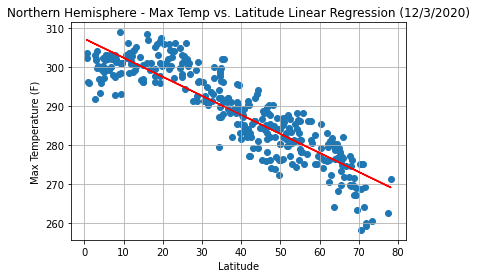

<Figure size 432x288 with 0 Axes>

In [153]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Max Temp"])

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test1_df = northern_df["Lat"]
test2_df = northern_df["Max Temp"]

model = st.linregress(test1_df,test2_df)
y_values = test1_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

#show figure
plt.show()
# Save the figure
plt.savefig('NorthernMaxTempPerLat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8319346583108665.
2      256.963183
3      274.583183
4      256.553183
5      248.353183
6      287.343183
          ...    
471    270.903183
472    281.723183
475    302.543183
479    286.673183
492    300.713183
Name: Lat, Length: 154, dtype: float64
y = 0.42x +302.73


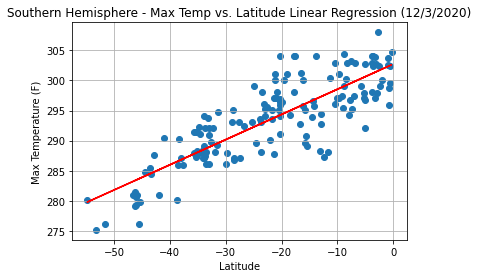

<Figure size 432x288 with 0 Axes>

In [152]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Max Temp"])

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test3_df = southern_df["Lat"]
test4_df = southern_df["Max Temp"]

model = st.linregress(test3_df,test4_df)
y_values = test3_df*model[0]+model[1]
plt.plot(test3_df, y_values, color ='r')

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('SouthernMaxTempPerLat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.08285303226188763.
0      100.833126
1       91.053126
7      125.933126
8      124.913126
9      129.283126
          ...    
495    104.803126
496     90.823126
497    111.963126
498    120.993126
499    106.343126
Name: Lat, Length: 339, dtype: float64
y = 0.08x +65.45


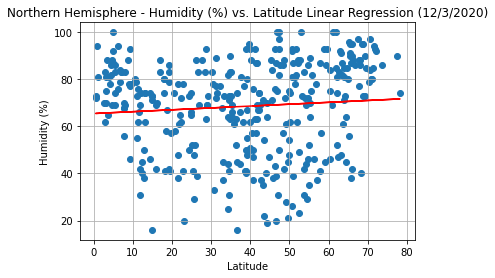

<Figure size 432x288 with 0 Axes>

In [151]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Humidity"])

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test5_df = northern_df["Lat"]
test6_df = northern_df["Humidity"]

model = st.linregress(test5_df,test6_df)
y_values = test5_df*model[0]+model[1]
plt.plot(test1_df, y_values, color ='r')

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('NorthernHumidityPerLat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.09081438320520753.
2      29.145807
3      46.765807
4      28.735807
5      20.535807
6      59.525807
         ...    
471    43.085807
472    53.905807
475    74.725807
479    58.855807
492    72.895807
Name: Lat, Length: 154, dtype: float64
y = 0.12x +75.22


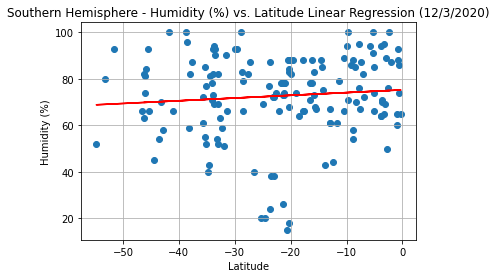

<Figure size 432x288 with 0 Axes>

In [150]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Humidity"])

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test7_df = southern_df["Lat"]
test8_df = southern_df["Humidity"]

model = st.linregress(test7_df,test8_df)
y_values = test7_df*model[0]+model[1]
plt.plot(test7_df, y_values, color ='r')


#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('SouthernHumidityPerLat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.18549552424340343.
0       83.893741
1       74.113741
7      108.993741
8      107.973741
9      112.343741
          ...    
495     87.863741
496     73.883741
497     95.023741
498    104.053741
499     89.403741
Name: Lat, Length: 339, dtype: float64
y = 0.05x +48.54


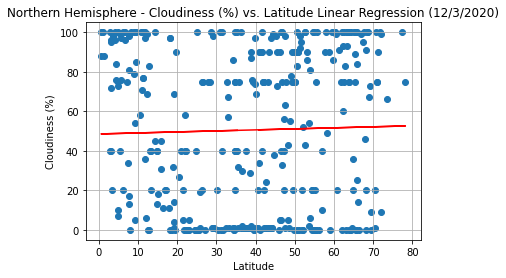

<Figure size 432x288 with 0 Axes>

In [149]:
 # Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test9_df = northern_df["Lat"]
test10_df = northern_df["Cloudiness"]

model = st.linregress(test9_df,test10_df)
y_values = test9_df*model[0]+model[1]
plt.plot(test9_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Cloudiness"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('NorthernCloudinessPerLat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.3402213437483236.
2      12.09205
3      29.71205
4      11.68205
5       3.48205
6      42.47205
         ...   
471    26.03205
472    36.85205
475    57.67205
479    41.80205
492    55.84205
Name: Lat, Length: 154, dtype: float64
y = 0.51x +57.77


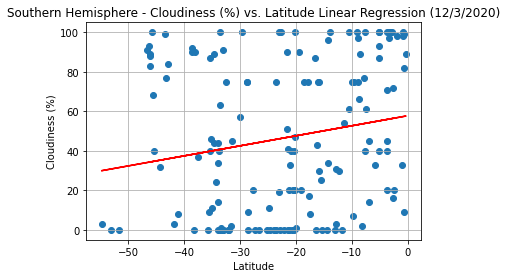

<Figure size 432x288 with 0 Axes>

In [148]:
 # Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test11_df = southern_df["Lat"]
test12_df = southern_df["Cloudiness"]

model = st.linregress(test11_df,test12_df)
y_values = test11_df*model[0]+model[1]
plt.plot(test11_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Cloudiness"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('SouthernCloudinessPerLat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.8920597075773424.
0      38.014285
1      28.234285
7      63.114285
8      62.094285
9      66.464285
         ...    
495    41.984285
496    28.004285
497    49.144285
498    58.174285
499    43.524285
Name: Lat, Length: 339, dtype: float64
y = 0.02x +2.69


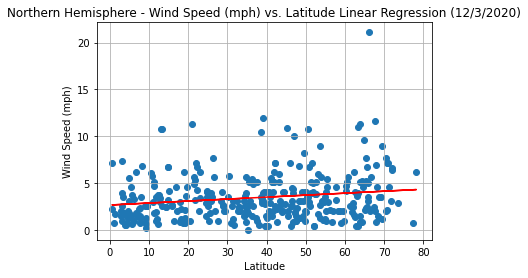

<Figure size 432x288 with 0 Axes>

In [154]:
# Build a scatter plot for each data type
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test13_df = northern_df["Lat"]
test14_df = northern_df["Wind Speed"]

model = st.linregress(test13_df,test14_df)
y_values = test13_df*model[0]+model[1]
plt.plot(test13_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_df["Lat"], northern_df["Wind Speed"])

#get regression values
regress_values = northern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('NothernWindSpeedPerLat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3402213437483236.
2     -44.27611
3     -26.65611
4     -44.68611
5     -52.88611
6     -13.89611
         ...   
471   -30.33611
472   -19.51611
475     1.30389
479   -14.56611
492    -0.52611
Name: Lat, Length: 154, dtype: float64
y = -0.06x +1.97


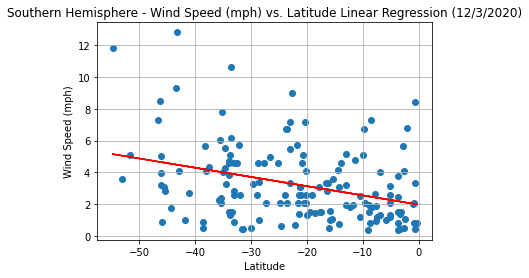

<Figure size 432x288 with 0 Axes>

In [147]:
# Build a scatter plot for each data type
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (12/3/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Determine R Value 
print(f"The r-value is {rvalue}.")

#LinReg and plot line 
test15_df = southern_df["Lat"]
test16_df = southern_df["Wind Speed"]

model = st.linregress(test15_df,test16_df)
y_values = test15_df*model[0]+model[1]
plt.plot(test15_df, y_values, color ='r')

#perform a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_df["Lat"], southern_df["Wind Speed"])

#get regression values
regress_values = southern_df["Lat"] + slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

# Show plot
plt.show()

# Save the figure
plt.savefig('SouthernWindSpeedPerLat.png')

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

For Part I, you must include a written description of three observable trends based on the data.

1.) Cities whose latitude is about 0 to 20, tend to have the greatest max temperature (F).

2.) The max city wind speed recorded in the southern hemisphere is about 12.82, where as the max city wind speed recorded in the northern hemisphere is about 21.1 (almost double!). When you look at the average wind speed though in each hemisphere. they are more similar though. There is an average wind speed of about 3.24 in the southern hemisphere and an average wind speed of about 3.49 in the nothern hemisphere.

3.) It is imperative to note that the data I am using is with 339 nothern cities and 154 southern cities. This could skew the data to a conclusion based on an uneven city amounts in each hemisphere. 